In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
path="incident_event_log.csv"

In [16]:
# Import the Dataset
dataset = pd.read_csv(path)

In [17]:
dataset.shape

(141712, 36)

In [18]:
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/02/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,01/03/2016 09:52,06/03/2016 10:00


In [19]:
dataset.info()
#missing percentage
dataset.isnull().sum() * 100 / len(dataset)
#Ok there are no null entry.
#but have many '?'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

number                     0.0
incident_state             0.0
active                     0.0
reassignment_count         0.0
reopen_count               0.0
sys_mod_count              0.0
made_sla                   0.0
caller_id                  0.0
opened_by                  0.0
opened_at                  0.0
sys_created_by             0.0
sys_created_at             0.0
sys_updated_by             0.0
sys_updated_at             0.0
contact_type               0.0
location                   0.0
category                   0.0
subcategory                0.0
u_symptom                  0.0
cmdb_ci                    0.0
impact                     0.0
urgency                    0.0
priority                   0.0
assignment_group           0.0
assigned_to                0.0
knowledge                  0.0
u_priority_confirmation    0.0
notify                     0.0
problem_id                 0.0
rfc                        0.0
vendor                     0.0
caused_by                  0.0
closed_c

In [20]:
#set all '?' entry as null and reread
missing_values = ['?']
dataset = pd.read_csv(path, na_values = missing_values)
print(dataset.isnull().values.sum())

C:\Users\jingr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


894597


In [21]:
dataset.isnull().sum() * 100 / len(dataset)
# the "cmdb_ci","problem_id","rfc","vendor","caused_by" columns don't have enough non-null values.  
# So, we delete these columns.

number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
cmdb_ci                    99.685983
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
n

In [22]:
dataset.drop(["cmdb_ci","problem_id","rfc","vendor","caused_by"], inplace=True, axis=1)

In [23]:
dataset.isnull().sum() * 100 / len(dataset)

number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
notify                      0.000000
c

In [24]:
#then we start to covert every column outside 'object'
def print_unique():
    for mstr in dataset:
        print(mstr+":")
        print(dataset[mstr].unique()[0:20])
print_unique()



number:
['INC0000045' 'INC0000047' 'INC0000057' 'INC0000060' 'INC0000062'
 'INC0000063' 'INC0000064' 'INC0000065' 'INC0000066' 'INC0000067'
 'INC0000070' 'INC0000071' 'INC0000073' 'INC0000074' 'INC0000076'
 'INC0000077' 'INC0000079' 'INC0000080' 'INC0000083' 'INC0000084']
incident_state:
['New' 'Resolved' 'Closed' 'Active' 'Awaiting User Info'
 'Awaiting Problem' 'Awaiting Vendor' 'Awaiting Evidence' '-100']
active:
[ True False]
reassignment_count:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
reopen_count:
[0 1 2 3 4 5 6 7 8]
sys_mod_count:
[ 0  2  3  4  1  5  6  7  8  9 10 11 12 13 18 19 14 15 16 17]
made_sla:
[ True False]
caller_id:
['Caller 2403' 'Caller 4416' 'Caller 4491' 'Caller 3765' 'Caller 2146'
 'Caller 2838' 'Caller 5323' 'Caller 3796' 'Caller 442' 'Caller 3757'
 'Caller 271' 'Caller 2519' 'Caller 527' 'Caller 2949' 'Caller 3304'
 'Caller 2471' 'Caller 1194' 'Caller 4866' 'Caller 3038' 'Caller 917']
opened_by:
['Opened by  8' 'Opened by  397' 'Opened by  1

In [25]:
import datetime
#datetime.datetime.strptime("29/02/2016 15:51",'%d/%m/%Y %H:%M')
date_list=["opened_at","sys_created_at","sys_updated_at","resolved_at","closed_at"]
for mstr in date_list:
    dataset[mstr]=dataset[mstr].apply(lambda x:datetime.datetime.strptime(x,'%d/%m/%Y %H:%M')if type(x) is str else np.NaN)
#unexpectedly, it work

In [26]:
print_unique()


number:
['INC0000045' 'INC0000047' 'INC0000057' 'INC0000060' 'INC0000062'
 'INC0000063' 'INC0000064' 'INC0000065' 'INC0000066' 'INC0000067'
 'INC0000070' 'INC0000071' 'INC0000073' 'INC0000074' 'INC0000076'
 'INC0000077' 'INC0000079' 'INC0000080' 'INC0000083' 'INC0000084']
incident_state:
['New' 'Resolved' 'Closed' 'Active' 'Awaiting User Info'
 'Awaiting Problem' 'Awaiting Vendor' 'Awaiting Evidence' '-100']
active:
[ True False]
reassignment_count:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
reopen_count:
[0 1 2 3 4 5 6 7 8]
sys_mod_count:
[ 0  2  3  4  1  5  6  7  8  9 10 11 12 13 18 19 14 15 16 17]
made_sla:
[ True False]
caller_id:
['Caller 2403' 'Caller 4416' 'Caller 4491' 'Caller 3765' 'Caller 2146'
 'Caller 2838' 'Caller 5323' 'Caller 3796' 'Caller 442' 'Caller 3757'
 'Caller 271' 'Caller 2519' 'Caller 527' 'Caller 2949' 'Caller 3304'
 'Caller 2471' 'Caller 1194' 'Caller 4866' 'Caller 3038' 'Caller 917']
opened_by:
['Opened by  8' 'Opened by  397' 'Opened by  1

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null datetime64[ns]
sys_created_by             88636 non-null object
sys_created_at             88636 non-null datetime64[ns]
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null datetime64[ns]
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory             

In [28]:
import re
delete_prefix_list=["caller_id","opened_by","sys_created_by","sys_updated_by",
                 "location","category","subcategory","u_symptom","assignment_group",
                 "assigned_to","closed_code","resolved_by"]
c = re.compile(r'(.*?)([0-9]*)($)')
for mstr in delete_prefix_list:
    pass
    #dataset[mstr]=dataset[mstr].apply(lambda x:c.match(str(x)).group(2))

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null datetime64[ns]
sys_created_by             88636 non-null object
sys_created_at             88636 non-null datetime64[ns]
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null datetime64[ns]
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory             

In [30]:
dataset.describe()
#useless, because all of these are not numerical value(all means categorical)


,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


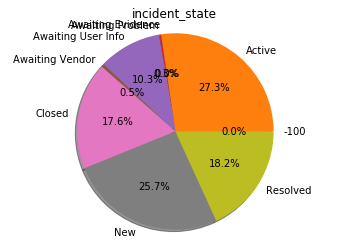

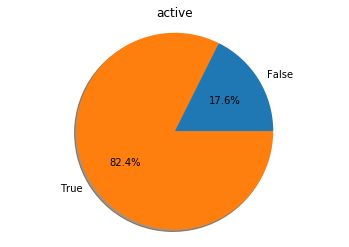

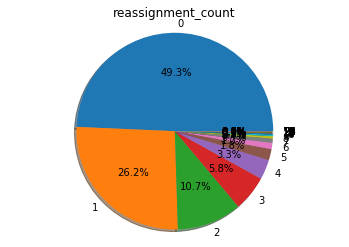

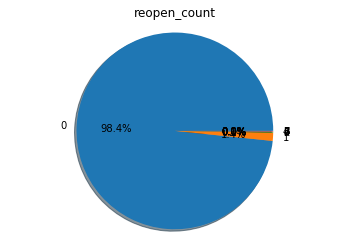

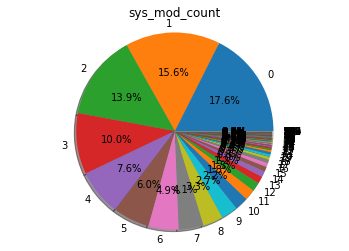

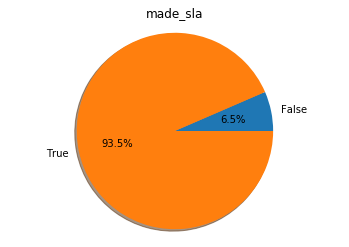

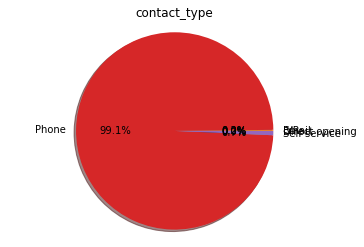

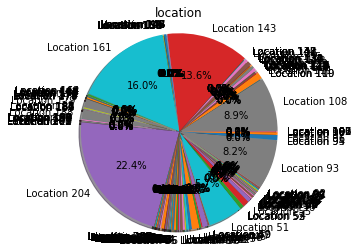

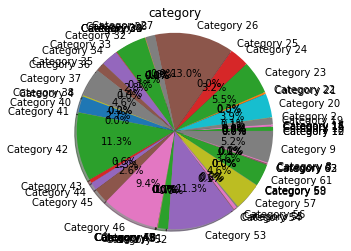

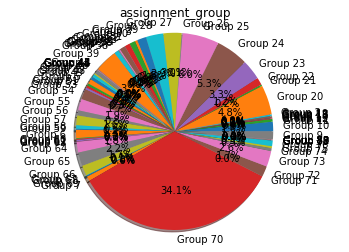

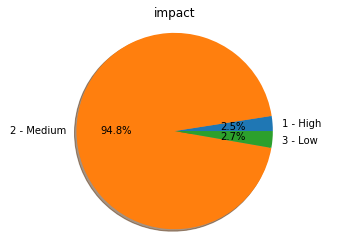

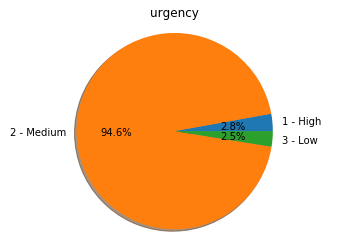

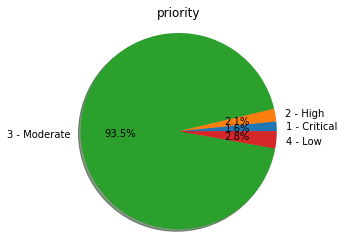

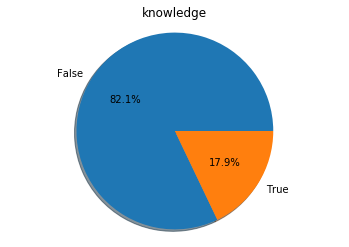

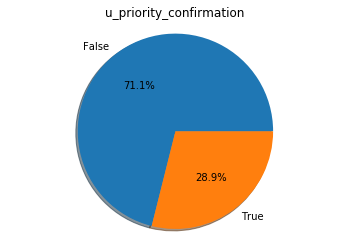

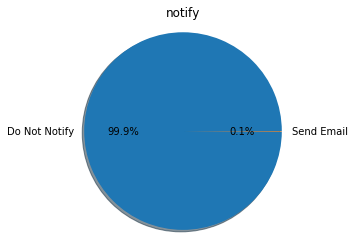

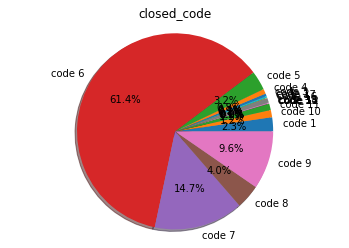

In [31]:
#draw pie barplot
import matplotlib.pyplot as plt
draw_polt=['incident_state','active','reassignment_count',
           'reopen_count','sys_mod_count','made_sla',
           'contact_type','location','category','assignment_group','impact','urgency','priority',
           'knowledge','u_priority_confirmation','notify','closed_code']
for mstr in draw_polt:
    labels = dataset[mstr].astype('category').cat.categories.tolist()
    counts = dataset[mstr].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
    ax1.axis('equal')
    plt.title(mstr)
    plt.show()

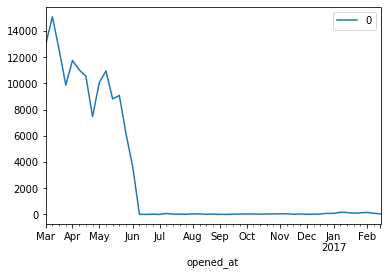

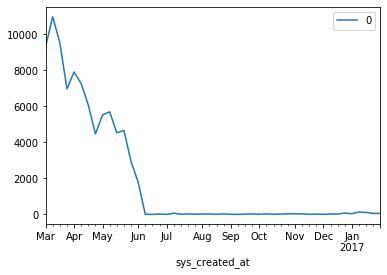

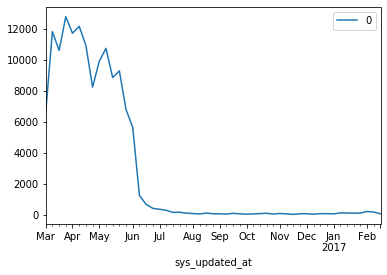

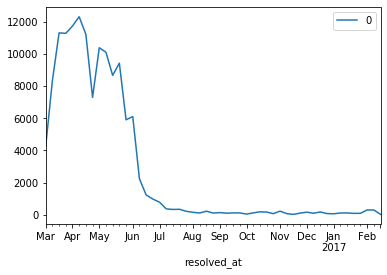

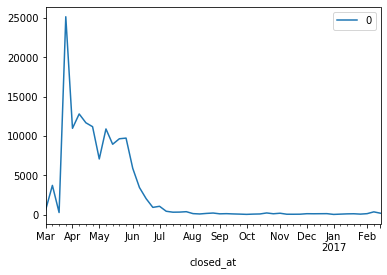

In [32]:
#draw time series density graph
for mstr in date_list:
    s=dataset[mstr]
    s2=pd.Series(s.index.values, index=s ).resample('W').count()
    s3=s2.to_frame()
    s3.plot()
    plt.show()

In [33]:
#delete the row which data is incomplete 
record=[]
for index, row in dataset.iterrows():
    if row.count()<31:
        record.append(index)
dataset=dataset.drop(record)

In [34]:
dataset.isnull().sum() * 100 / len(dataset)
#now, all row is complete


number                     0.0
incident_state             0.0
active                     0.0
reassignment_count         0.0
reopen_count               0.0
sys_mod_count              0.0
made_sla                   0.0
caller_id                  0.0
opened_by                  0.0
opened_at                  0.0
sys_created_by             0.0
sys_created_at             0.0
sys_updated_by             0.0
sys_updated_at             0.0
contact_type               0.0
location                   0.0
category                   0.0
subcategory                0.0
u_symptom                  0.0
impact                     0.0
urgency                    0.0
priority                   0.0
assignment_group           0.0
assigned_to                0.0
knowledge                  0.0
u_priority_confirmation    0.0
notify                     0.0
closed_code                0.0
resolved_by                0.0
resolved_at                0.0
closed_at                  0.0
dtype: float64

In [35]:
path1="incident_event_log_new.csv"
dataset.to_csv(path1)

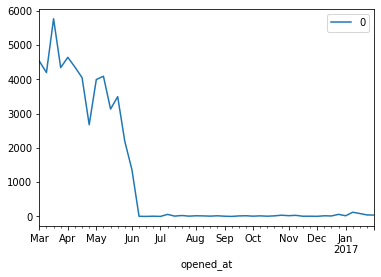

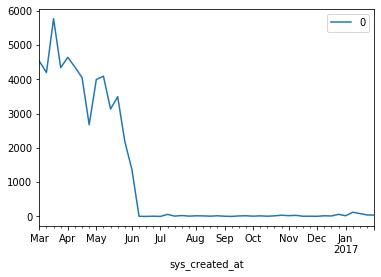

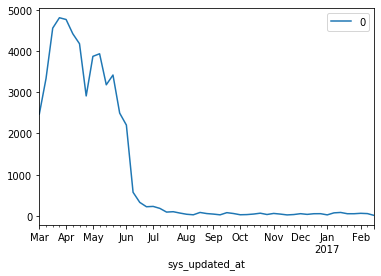

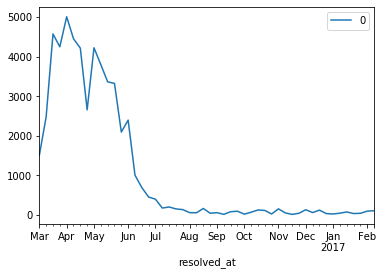

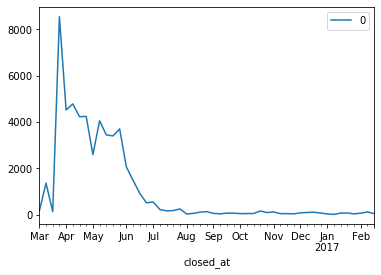

In [36]:
#time series graph after cleaning
for mstr in date_list:
    s=dataset[mstr]
    s2=pd.Series(s.index.values, index=s).resample('W').count()
    s3=s2.to_frame()
    s3.plot()
    plt.show()

In [37]:
for mstr in date_list:
    s=dataset[mstr]
    s2=pd.Series(s.index.values, index=s).resample('M').count()
    s3=s2.to_frame()
    print(s2)

opened_at
2016-02-29      546
2016-03-31    21798
2016-04-30    16089
2016-05-31    14412
2016-06-30        9
2016-07-31      102
2016-08-31       65
2016-09-30       40
2016-10-31       73
2016-11-30       64
2016-12-31      105
2017-01-31      296
Freq: M, dtype: int64
sys_created_at
2016-02-29      546
2016-03-31    21798
2016-04-30    16089
2016-05-31    14408
2016-06-30       13
2016-07-31      102
2016-08-31       65
2016-09-30       40
2016-10-31       73
2016-11-30       64
2016-12-31      105
2017-01-31      296
Freq: M, dtype: int64
sys_updated_at
2016-02-29      182
2016-03-31    18482
2016-04-30    16546
2016-05-31    14522
2016-06-30     2183
2016-07-31      459
2016-08-31      201
2016-09-30      188
2016-10-31      167
2016-11-30      158
2016-12-31      156
2017-01-31      267
2017-02-28       88
Freq: M, dtype: int64
resolved_at
2016-02-29       34
2016-03-31    16663
2016-04-30    16620
2016-05-31    13926
2016-06-30     3651
2016-07-31      681
2016-08-31      363
20

In [41]:
# Well, after analyzing 
dataset["solve_time"]=dataset["resolved_at"]-dataset["opened_at"]
dataset["solve_time"].head()

4   1 days 05:12:00
5   1 days 05:12:00
6   1 days 05:12:00
7   1 days 05:12:00
8   1 days 05:12:00
Name: solve_time, dtype: timedelta64[ns]